In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
x_data = np.random.rand(100).astype(np.float32)

In [3]:
y_data = x_data * 3 + 2
y_data = np.vectorize(lambda y: y + np.random.normal(loc=0.0, scale=0.1))(y_data)

In [4]:
# Defined y = 2X + 2 with some gaussian noise.

In [5]:
# Randomly initialize a and b, 
a = tf.Variable(1.0)
b = tf.Variable(0.2)
y = a * x_data + b

In [6]:
# Loss function
loss = tf.reduce_mean(tf.square(y - y_data))

In [7]:
# Using gradient descent for optimizing parameters of model to reduce "loss" variable
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [8]:
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [9]:
train_data = []
for step in range(100):
    evals = sess.run([train,a,b])[1:]
    if step % 5 == 0:
        print(step, evals)
        train_data.append(evals)

(0, [2.6276326, 3.0308249])
(5, [2.4694266, 2.2852707])
(10, [2.6106267, 2.2087712])
(15, [2.7120528, 2.1526575])
(20, [2.785265, 2.112155])
(25, [2.8381109, 2.0829198])
(30, [2.8762565, 2.0618172])
(35, [2.9037905, 2.0465848])
(40, [2.923665, 2.0355899])
(45, [2.9380109, 2.0276535])
(50, [2.9483662, 2.0219247])
(55, [2.9558408, 2.0177896])
(60, [2.9612362, 2.0148048])
(65, [2.9651306, 2.0126505])
(70, [2.9679415, 2.0110953])
(75, [2.9699707, 2.0099728])
(80, [2.9714353, 2.0091627])
(85, [2.9724925, 2.0085776])
(90, [2.9732556, 2.0081553])
(95, [2.9738066, 2.0078506])


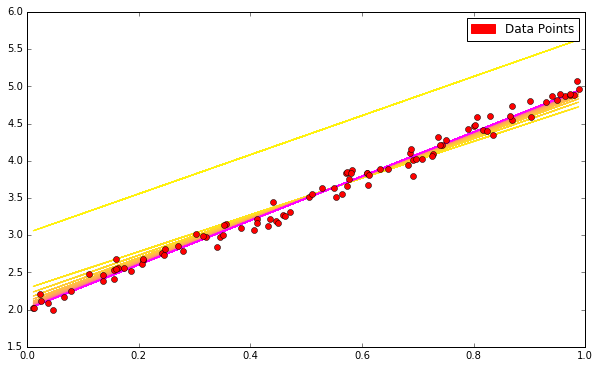

In [10]:
converter = plt.colors
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(x_data)
    line = plt.plot(x_data, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(x_data, y_data, 'ro')


green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()